In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score  # how well we are explaining our variants wrt regression
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Approach01: Traditional Features**

### **Transforming Target**
1. Log Test
2. Square Root
3. Box Cox

Apply transformations to make target variable more normally distributed for regression.

In [24]:
from google.colab import drive
drive.mount('/content/drive')
df_train = pd.read_csv("/content/drive/My Drive/IntelliTech-DataSet/EssaySet01_Features.csv", index_col =0)
df_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sent_Count,Word_Count,Char_Count,Avg_Word_Count,Verb_Count,Noun_Count,Adj_Count,Conj_Count,Adverb_Count,pNoun_Count,...,Count_Exclamation,Count_Comma,Count_Questionmark,Count_Hyphens,Capitalization_Errors,Grammar_Error_Count,Punctuation_Errors,Connectivity_Index,Semantic_Similarity,Total Score
0,16,386,1875,3.984456,55,74,18,14,15,48,...,4,18,2,1,2,2,1,24.552787,0.396690,8
1,20,464,2288,4.030172,71,97,19,18,19,49,...,1,12,1,0,0,4,6,25.344232,0.311087,9
2,14,313,1541,4.035144,42,69,17,16,11,25,...,0,9,0,0,1,5,4,14.662850,0.291317,7
3,27,611,3165,4.328969,71,126,39,17,21,33,...,2,13,1,0,1,0,2,32.408323,0.269810,10
4,30,517,2569,4.071567,61,107,30,15,34,41,...,0,13,0,0,1,1,2,27.824804,0.264052,8


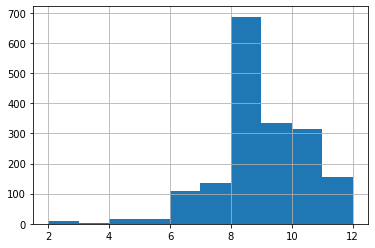

In [3]:
df_train['Total Score'].hist()

In [4]:
#This test outputs a "p-value". The higher this p-value is the closer the distribution is to normal.
#If the p-value > 0.05, then it is bell-curve distribution.
#Our data is clearly right skewed (Histogram)
normaltest(df_train['Total Score'].values)  

NormaltestResult(statistic=127.21536231858303, pvalue=2.3742971207847717e-28)

In [ ]:
df_train['Total Score'].describe()

count    1783.000000
mean        8.528323
std         1.538565
min         2.000000
25%         8.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: Total Score, dtype: float64

#### Transforming Target Through Log Test

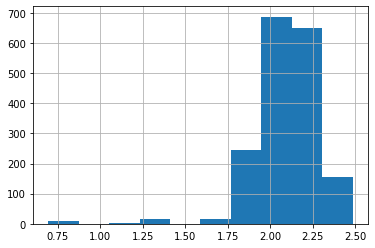

In [5]:
log_scores = np.log(df_train['Total Score'])
log_scores.hist();

In [6]:
log_scores

0       2.079442
1       2.197225
2       1.945910
3       2.302585
4       2.079442
          ...   
1778    2.079442
1779    1.945910
1780    2.079442
1781    0.693147
1782    1.945910
Name: Total Score, Length: 1783, dtype: float64

In [7]:
normaltest(log_scores)   # No significant change in p-value

NormaltestResult(statistic=967.974762708955, pvalue=6.411371863279588e-211)

Transforming Through Square Root Transformation

(array([ 10.,   1.,  17.,   0.,  17., 110., 822., 334., 316., 156.]),
 array([1.41421356, 1.61920237, 1.82419117, 2.02917998, 2.23416878,
        2.43915759, 2.64414639, 2.8491352 , 3.054124  , 3.25911281,
        3.46410162]),
 <a list of 10 Patch objects>)

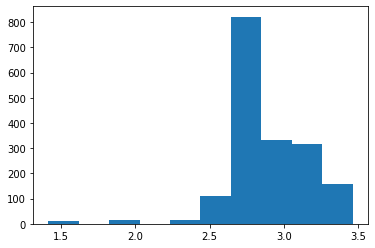

In [8]:
sqrt_scores = np.sqrt(df_train['Total Score'])
plt.hist(sqrt_scores)

In [9]:
normaltest(sqrt_scores)

NormaltestResult(statistic=456.280616698139, pvalue=8.316162831695822e-100)

Target Transformation Through BoxCox



In [10]:
bc_result = boxcox(df_train['Total Score'])
boxcox_score = bc_result[0]
lam = bc_result[1]
lam

1.5655301603375742

In [26]:
boxcox_score.shape

(1783,)

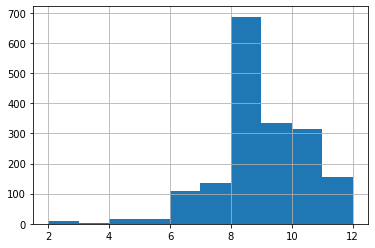

In [11]:
df_train['Total Score'].hist();

In [12]:
normaltest(boxcox_score)

NormaltestResult(statistic=17.904988785940628, pvalue=0.00012941394786243168)

Significantly more normally distributed (according to p value) than the other two distributions

### **Linear Regression Model**


In [31]:
def linearRegression_basic(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_pred = lr.predict(X_test)
  plot_result(y_test,y_pred)
  return (r2_score(y_test,y_pred))

def plot_result(y_test,y_pred):
  sns.set_context('talk')
  sns.set_style('ticks')
  sns.set_palette('dark')
  ax = plt.axes()
  ax.scatter(y_test, y_pred, alpha=.5)
  ax.set(xlabel='Ground truth', 
        ylabel='Predictions',
        title='Scores Predictions vs Truth, using Linear Regression');



With basic model:  0.6928361528118854
With Boxcox Variation to increase uniformity in target variable 0.6966601679542619


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


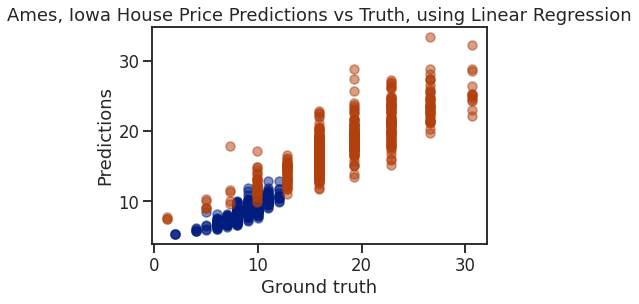

In [32]:
#basic model
y_col = "Total Score"
X = df_train.drop(y_col, axis=1)
y = df_train[y_col]
print("With basic model: ", linearRegression_basic(X,y))

#boxcox variation
print("With Boxcox Variation to increase uniformity in target variable" ,linearRegression_basic(X,boxcox_score))

#StandardScalar
#PolynomialFeatures
#FowardSelection
#CrossValidation (k-folds)
#kappa metric implementation


### **Word2Vec Features**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/IntelliTech-DataSet/EssaySet01.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Essay,Rater_1 Score,Rater_2 Score,Total Score
0,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0
4,5,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0


In [ ]:
essays = df['Essay']
essays.shape

(1783,)

In [ ]:
# create a list of essay strings
essay_list = [ess for ess in essays]

# tokenize the string into words
tokens = [word_tokenize(ess) for ess in essay_list]

# Remove non-alphabetic tokens, such as punctuation
words_list = [[word.lower() for word in sentences if word.isalpha()] for sentences in tokens]

# Remove stopwords
words_list = [[word for word in sentence if not word in stop_words] for sentence in words_list]


In [ ]:
def word2vec_model(docs_list):
  model = Word2Vec(docs_list, min_count=1)

  # understanding the model
  # print("Dimension of Word Vectors are: ", model.vector_size)
  # word embedding vector for a specific token 'dear'
  #print(model.wv['dear'])

  vocab = list(model.wv.vocab.keys())
  df = pd.DataFrame([model.wv.word_vec(w) for w in vocab], index=vocab)
  print(df.shape)
  df.to_csv("word2vec_features.csv", index = True)

word2vec_model(words_list)

(15342, 100)
